In [1]:
import numpy as np
from scipy.stats import unitary_group

# import circuit, gates
from QuICT.core import *
from QuICT.simulation.simulator import Simulator
from QuICT.simulation.gpu_simulator import ConstantStateVectorSimulator

# Circuit

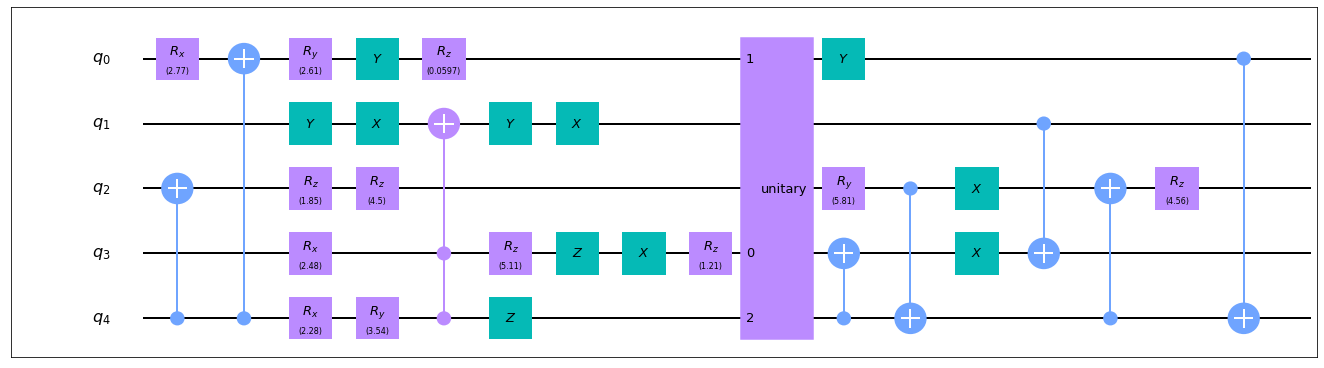

In [2]:
# build circuit with 5 quantum qubits
qubits = 5
cir = Circuit(qubits)

# append gates into circuit
gate_size = 10
typelist = [GATE_ID['Rx'], GATE_ID['Ry'], GATE_ID['Rz'], GATE_ID['X'], GATE_ID['Y'], GATE_ID['Z'], GATE_ID['CX']]
cir.random_append(gate_size, typeList=typelist)
target = random.sample(range(5), 3)
CCX | cir(target)
cir.random_append(gate_size, typeList=typelist)
matrix = unitary_group.rvs(2 ** 3)
target = random.sample(range(5), 3)
Unitary(matrix) | cir(target)
cir.random_append(gate_size, typeList=typelist)

cir.draw(filename="circuit")

In [3]:
# show circuit info
def circuit_info(circuit):
    circuit_info = {
        "size": circuit.circuit_size(),
        "width": circuit.circuit_width(),
        "depth": circuit.circuit_depth(),
        "1-qubit_gates": circuit.circuit_count_1qubit(),
        "2-qubits_gates": circuit.circuit_count_2qubit(),
        "Swap_gates": circuit.circuit_count_gateType(Swap.type),
        "CNOT_gates": circuit.circuit_count_gateType(CX.type),
        "Toffoli_gates": circuit.circuit_count_gateType(CCX.type),
        "Unitary_gates": circuit.circuit_count_gateType(Unitary.type),
    }

    return circuit_info

In [4]:
circuit_info(cir)

{'size': 32,
 'width': 5,
 'depth': 15,
 '1-qubit_gates': 23,
 '2-qubits_gates': 7,
 'Swap_gates': 0,
 'CNOT_gates': 7,
 'Toffoli_gates': 1,
 'Unitary_gates': 1}

# Simulator

In [6]:
gpu_simulator = ConstantStateVectorSimulator(
    precision="double",
    optimize=True,
    gpu_device_id=0,
    sync=True
)

In [7]:
gpu_simulator.run(circuit=cir)

array([-1.87210166e-02+0.06050437j,  7.71924049e-02-0.2494778j ,
        7.71485256e-02-0.03684548j, -3.18106668e-01+0.15192503j,
       -2.29641661e-01-0.07797246j,  5.56936316e-02+0.0189102j ,
       -4.06607823e-01+0.0641228j ,  9.86121864e-02-0.01555132j,
       -3.79635900e-02+0.00837099j,  1.56535345e-01-0.03451612j,
        4.46590325e-02-0.01141501j, -1.84142677e-01+0.04706753j,
       -9.81333236e-02+0.06630462j,  2.37996936e-02-0.01608047j,
       -1.24327155e-01-0.02802771j,  3.01523284e-02+0.00679739j,
        1.28795961e-01-0.51734772j, -3.12361213e-02+0.12546928j,
        5.25953037e-02+0.01854203j, -1.27556274e-02-0.00449689j,
        1.69501241e-04-0.01502281j, -6.98904801e-04+0.06194358j,
       -4.61677426e-02-0.03987815j,  1.90363544e-01+0.16442964j,
        6.11246223e-02+0.01342838j, -1.48241925e-02-0.00325671j,
        1.61948824e-01+0.04506517j, -3.92764889e-02-0.01092939j,
       -7.40020354e-03-0.00791071j,  3.05132739e-02+0.03261824j,
       -4.45822198e-02+0.

In [13]:
# Initial simulator
simulator = Simulator(
    device="GPU",   # [CPU/GPU/qiskit/qcompute]
    backend="statevector",
    shots=10,
    optimize=True,
    precision='double',
    gpu_device_id=1,
    sync=True
)

In [15]:
simulator.run(cir, use_previous=False, circuit_out=True, statevector_out=True)

{'id': '42143c02799011ec82ca71501be6d028',
 'mode': 'GPU-statevector',
 'shots': 10,
 'options': {'precision': 'double',
  'gpu_device_id': 1,
  'sync': True,
  'optimize': True},
 'counts': defaultdict(int,
             {'00100': 2,
              '10000': 2,
              '00110': 2,
              '11111': 1,
              '00001': 1,
              '01011': 1,
              '00011': 1}),
 '_spending_time': 0.034674072265624994,
 'output_path': '/home/likaiqi/Workplace/test/QuICT/example/demo/output/42143c02799011ec82ca71501be6d028'}